In [1]:
from stainlib.augmentation.augmenter import StainAugmentor
from stainlib.normalization.normalizer import ExtractiveStainNormalizer, ReinhardStainNormalizer
from stainlib.utils.stain_utils import LuminosityStandardizer
from stainlib.utils.plot_utils import _plot_imagegrid
import stainlib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import time
import datetime
from threading import Thread

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

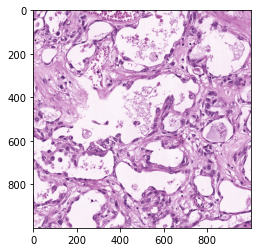

In [18]:
image = np.array(Image.open("C:\\dataset\\Ovarian_After_Split\\Invalid\\Invalid_original_P001707649A_28_10.png_7991ab8a-09ce-4547-ab4c-50ab62d481c8.png"))
plt.imshow(image)

In [19]:
vahadane_augmentation = StainAugmentor(method='macenko')
vahadane_augmentation.fit(image)

In [20]:
vahadane_augmentation.pop()

array([[[216, 163, 209],
        [168,  91, 162],
        [173,  89, 160],
        ...,
        [211, 151, 202],
        [205, 140, 196],
        [194, 122, 184]],

       [[193, 123, 185],
        [176, 103, 171],
        [185, 105, 173],
        ...,
        [205, 140, 196],
        [202, 133, 191],
        [193, 119, 182]],

       [[173, 103, 171],
        [187, 117, 181],
        [191, 115, 179],
        ...,
        [195, 122, 184],
        [196, 123, 185],
        [194, 119, 182]],

       ...,

       [[246, 233, 245],
        [249, 240, 248],
        [250, 243, 250],
        ...,
        [209, 148, 200],
        [208, 146, 199],
        [214, 158, 206]],

       [[248, 237, 247],
        [249, 241, 249],
        [250, 243, 250],
        ...,
        [214, 158, 206],
        [210, 149, 201],
        [210, 149, 201]],

       [[248, 237, 247],
        [249, 241, 248],
        [249, 241, 249],
        ...,
        [202, 134, 192],
        [195, 126, 186],
        [188, 124, 185]]

E:\anaconda\envs\deeplearning\lib\site-packages\stainlib\utils\plot_utils.py:25: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([], [])
E:\anaconda\envs\deeplearning\lib\site-packages\stainlib\utils\plot_utils.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


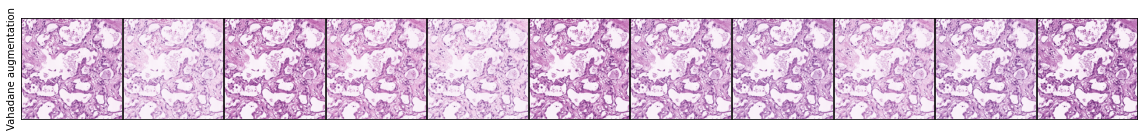

In [21]:
patches = []
titles = []
n_examples = 10
patches.append(image)
titles.append('Vahadane augmentation')
for i in range(n_examples):
    patches.append(vahadane_augmentation.pop())
    titles.append(None)
_plot_imagegrid(patches, (1,n_examples+1),figsize=(20,10), ylabels=titles)

In [3]:
# Reference
std_image_tar = np.array(Image.open("C:\\dataset\\Ovarian_After_Split\\Efficient\\1427159G-Y_3_11.png")).astype(np.uint8)
normalizer = ExtractiveStainNormalizer(method='vahadane')
target = LuminosityStandardizer.standardize(std_image_tar)
normalizer.fit(target)

numpy.ndarray

In [4]:
local = "C:\\dataset\\Ovarian_After_Split\\"
docs = os.listdir(local)
for d in docs:
    base_path = local + d + '\\'
    print(base_path)
    files = os.listdir(base_path)
    for file in tqdm(files):
        compose_file = base_path + file
        std_image_source = np.array(Image.open(compose_file)).astype(np.uint8)
        to_transformed = LuminosityStandardizer.standardize(std_image_source)
        transform = normalizer.transform(to_transformed)
        Image.fromarray(transform).save(compose_file)

C:\dataset\Ovarian_After_Split\Efficient\


  2%|▏         | 570/23809 [28:11<19:09:09,  2.97s/it]


KeyboardInterrupt: 

In [4]:
def stain_standardization(i, files):
    for file in files:
        std_image_source = np.array(Image.open(file)).astype(np.uint8)
        to_transformed = LuminosityStandardizer.standardize(std_image_source)
        transform = normalizer.transform(to_transformed)
        Image.fromarray(transform).save(file)

In [5]:

base_e = "D:\\Dataset\\test\\Invalid\\"
base_i = "D:\\Dataset\\test\\Efficient\\"
# val_e = "C:\\dataset\\Validation\\Efficient\\"
# val_i = "C:\\dataset\\Validation\\Invalid\\"
# test_path = "D:\\Dataset\\t\\"
f_s_e = os.listdir(base_e)
f_s_i = os.listdir(base_i)
# f_s_val_e = os.listdir(val_e)
# f_s_val_i = os.listdir(val_i)

# t1  = Thread(target=stain_standardization, args=(base_e, f_s_e[0:11904]))
# t2  = Thread(target=stain_standardization, args=(base_e, f_s_e[11904: ]))
# t3  = Thread(target=stain_standardization, args=(base_i, f_s_i))
# t4  = Thread(target=stain_standardization, args=(base_i, f_s_i[6374: ]))

In [4]:
# t1.start()
# t2.start()
# t3.start()


In [2]:

def unchanged_file(base, f_s):
    l = []
    for i in range(len(f_s)):
        c = base + f_s[i]
        change_time = time.strftime('%Y-%m-%d',time.localtime(os.stat(c).st_mtime))
        change_time = time.strptime(change_time, "%Y-%m-%d")

        if change_time < time.strptime('2022-6-8', "%Y-%m-%d"):
            l.append(c)
            continue

    return l

In [17]:
c_e = unchanged_file(base_e, f_s_e)
c_i = unchanged_file(base_i, f_s_i)

In [18]:
c_e.extend(c_i)


In [19]:
len(list(c_e))

0

In [9]:
t1  = Thread(target=stain_standardization, args=(1, c_e[0: 712]))
t2  = Thread(target=stain_standardization, args=(2, c_e[712: 1425]))
t3  = Thread(target=stain_standardization, args=(3, c_e[1425: ]))

In [10]:
t1.start()
t2.start()
t3.start()

['C:\\dataset\\Ovarian_After_Split\\Efficient\\1739558G_23_2.png',
 'C:\\dataset\\Ovarian_After_Split\\Efficient\\1739558G_23_20.png',
 'C:\\dataset\\Ovarian_After_Split\\Efficient\\1739558G_23_21.png',
 'C:\\dataset\\Ovarian_After_Split\\Efficient\\1739558G_23_22.png',
 'C:\\dataset\\Ovarian_After_Split\\Efficient\\1739558G_23_23.png',
 'C:\\dataset\\Ovarian_After_Split\\Efficient\\1739558G_23_24.png',
 'C:\\dataset\\Ovarian_After_Split\\Efficient\\1739558G_23_3.png',
 'C:\\dataset\\Ovarian_After_Split\\Efficient\\1739558G_23_4.png',
 'C:\\dataset\\Ovarian_After_Split\\Efficient\\1739558G_23_5.png',
 'C:\\dataset\\Ovarian_After_Split\\Efficient\\1739558G_23_6.png',
 'C:\\dataset\\Ovarian_After_Split\\Efficient\\1739558G_23_7.png',
 'C:\\dataset\\Ovarian_After_Split\\Efficient\\1739558G_23_8.png',
 'C:\\dataset\\Ovarian_After_Split\\Efficient\\1739558G_23_9.png',
 'C:\\dataset\\Ovarian_After_Split\\Efficient\\1739558G_24_1.png',
 'C:\\dataset\\Ovarian_After_Split\\Efficient\\1739558G_2

C:\dataset\Ovarian_After_Split\Efficient\1739558G_23_2.png
